<a href="https://colab.research.google.com/github/KevinAkat/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [31]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# Importing pandas
import pandas as pd

# Using !wget Bash command to get zip file
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

# Using !unzip Bash command to unzip CSV file
!unzip bank.csv.zip

--2020-04-07 20:52:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
ERROR: cannot verify archive.ics.uci.edu's certificate, issued by ‘CN=InCommon RSA Server CA,OU=InCommon,O=Internet2,L=Ann Arbor,ST=MI,C=US’:
  Issued certificate has expired.
To connect to archive.ics.uci.edu insecurely, use `--no-check-certificate'.
unzip:  cannot find or open bank.csv.zip, bank.csv.zip.zip or bank.csv.zip.ZIP.


*** The UCI link import isn't working? I'm going to do this first part by uploading the dataset from the GUI***

In [34]:
# Uploading the dataset

from google.colab import files
upload = files.upload()

Saving wine.data to wine.data


In [44]:
# Creating a list of column headers for the data set.

column_headers = ['Wine Class Number',
                  'Alcohol','Malic Acid','Ash','Alcalanity of Ash','Magnesium',
                  'Total Phenols','Flavanoids','Nondlavanoid Phenols',
                  'Proanthocyanins','Color Intensity',
                  'Hue','OD280/OD315 of Diluted Wines','Proline']

# Importing the data set with a parameter name=column_header

df_wine = pd.read_csv('wine.data', names=column_headers)


# Checking the header

df_wine.head()

,Wine Class Number,Alcohol,Malic Acid,Ash,Alcalanity of Ash,Magnesium,Total Phenols,Flavanoids,Nondlavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
# Checking the tail

df_wine.tail()

,Wine Class Number,Alcohol,Malic Acid,Ash,Alcalanity of Ash,Magnesium,Total Phenols,Flavanoids,Nondlavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [45]:
# Checking to see if the shape of the dataset mathces what it says on UCI:

print(df_wine.shape)

df_wine['Wine Class Number'].value_counts()


# Yes, the data matches with the UCI data description document. The class number
# counts matchup as the does the shape of the dataframe itself. 

(178, 14)


2    71
1    59
3    48
Name: Wine Class Number, dtype: int64

In [48]:
# Are there any NaN values?

pd.isnull(df_wine).sum()

# There are no NaN values.

Wine Class Number               0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalanity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nondlavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64

In [0]:
# Using Describe to generate summary statistics for the data:

df_wine.describe()

,Wine Class Number,Alcohol,Malic Acid,Ash,Alcalanity of Ash,Magnesium,Total Phenols,Flavanoids,Nondlavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# Importing the data set from my local machine
from google.colab import files
uploaded = files.upload()

In [0]:
# Creating the Data Frame
df_bank = pd.read_csv('bank.csv', sep=';')

In [12]:
# Inspecing the first 5 rows
df_bank.head(5)

# No, the dataset is not in order. I added the "sep" parameter to 
# the pd.read_csv function to fix the issue.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
# Inspecting the last 5 rows
df_bank.tail(5)

# All is in order from this perspective

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [14]:
# Checking the shape of the Dataframe
print(df_bank.shape)

# Yes, the DF shape here mathces with the URI data set description

# Changing the last column header from "y" to "Sub?" for "Subscribed?"
# To make that column header clearer.

df_bank.rename(columns={'y':'Sub?'}, inplace=True)

df_bank.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Sub?
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
# Checking for missing values
pd.isnull(df_bank).sum()

# There are no missing values. 


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Sub?         0
dtype: int64

In [16]:
# Displaying the summary statistics for the bank data
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [17]:
# Setting display option to 100 Max rows, so I can see all ages crosstabbed 
# with Subscriber counts

pd.set_option('display.max_rows',100)

# Crosstab table between "Age" and "Sub?" (whether they subscribed, either 'y' or 'n')

pd.crosstab(df_bank['age'],df_bank['Sub?'])



Sub?,no,yes
age,,
19,2,2
20,2,1
21,6,1
22,6,3
23,18,2
24,20,4
25,34,10
26,70,7
27,80,14


In [18]:
# Setting a display option
pd.set_option('display.max_rows',100)

# Crosstab table between "Job" and "Sub?" (whether they subscribed, either 'y' or 'n')
# Saving the crosstab table to a vairable called "job_ct"

job_ct = pd.crosstab(df_bank['job'],df_bank['Sub?'])

# Calculating the percentage of each group that said "Yes" to a bank deposit subsscription

# job_ct['percent_yes'] = job_ct['yes']/job_ct['no']

job_ct

Sub?,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


In [73]:
# Setting a display option
pd.set_option('display.max_rows',100)

# Crosstab table between "Marital Status" and "Sub?" (whether they subscribed, either 'y' or 'n')
# Saving the crosstab table to a vairable called "martial_ct"

marital_ct = pd.crosstab(df_bank['marital'],df_bank['Sub?'])

# Calculating the percentage of each group that "Yes" to a bank deposit subsscription

# marital = ['percent_yes'] = marital_ct['yes']/marital_ct['no']

marital_ct

Sub?,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

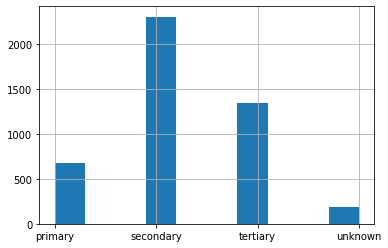

In [23]:
# Making a Histogram for the distirbution of the education dimension

df_bank['education'].hist();

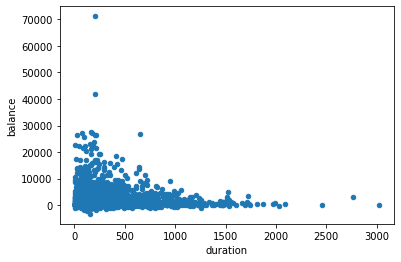

In [27]:
# Making a scatterplot between the Duration and Balance dimensions

df_bank.plot.scatter('duration', 'balance');


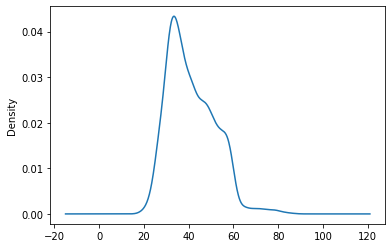

In [28]:
# Making a Density Plot for Age dimension 

df_bank['age'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


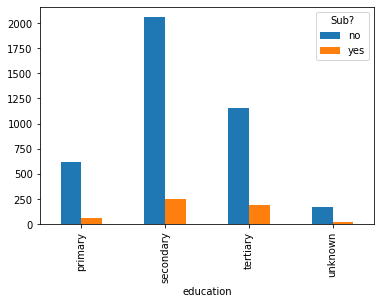

In [29]:
# Your Code Here

pd.crosstab(df_bank['education'], 
            df_bank['Sub?']).plot(kind='bar');


## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

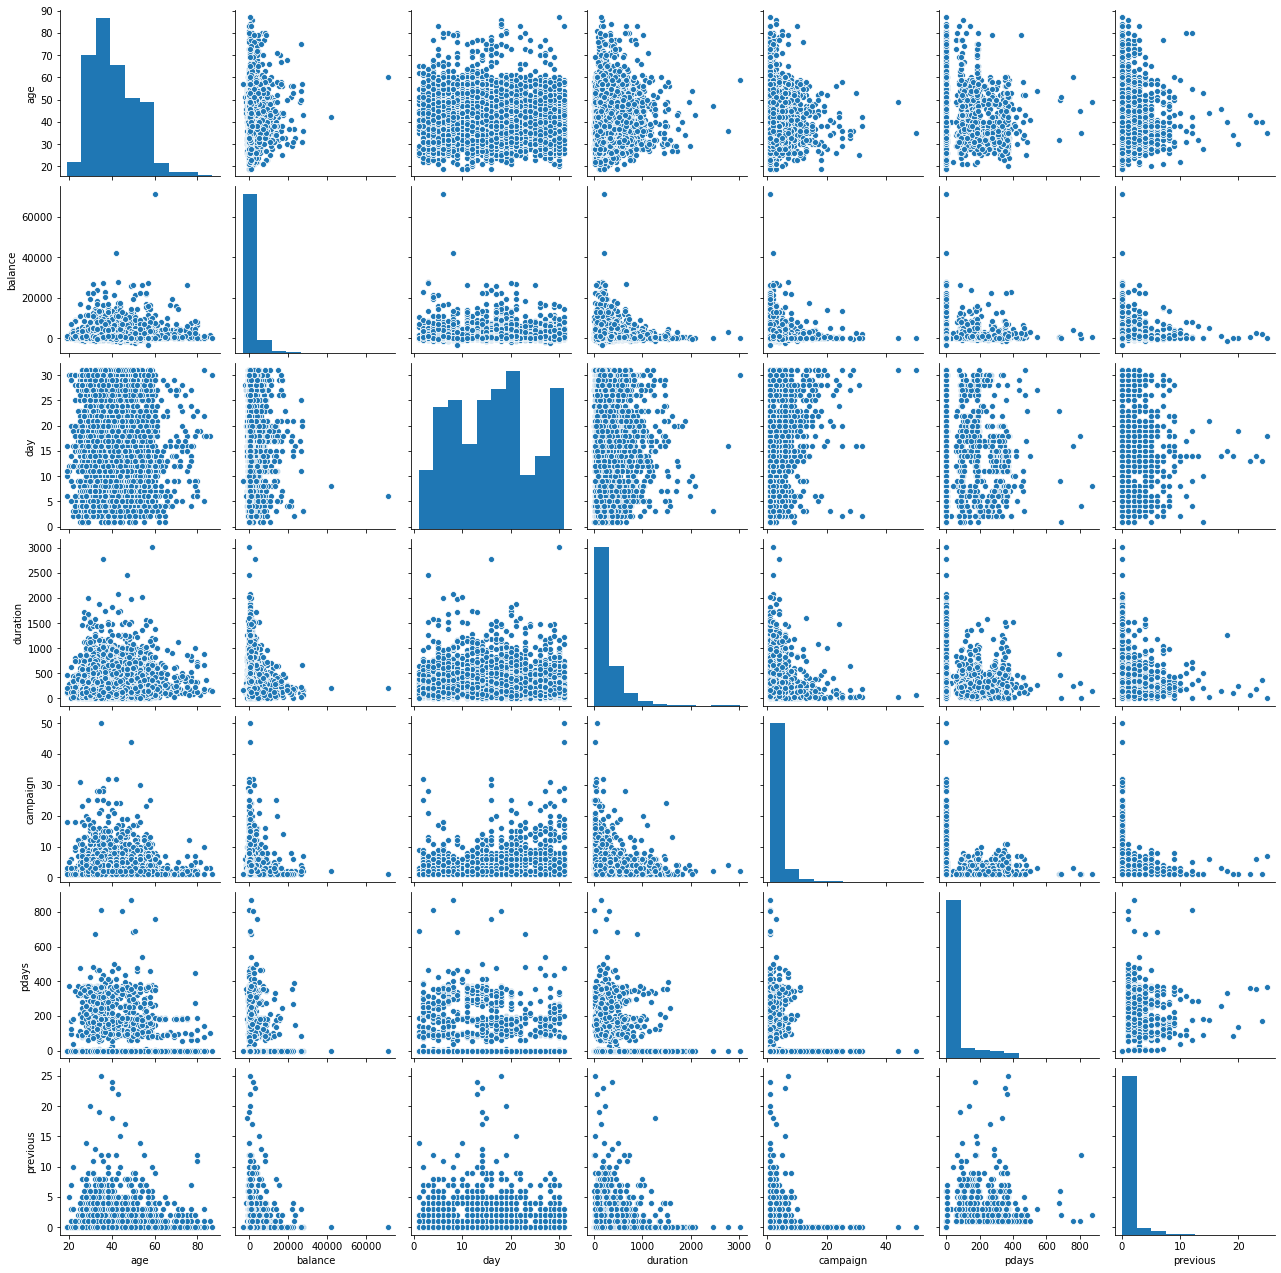

In [55]:
import seaborn as sns

sns.pairplot(df_bank);

In [68]:
# Applying pd.cut function on Balance Dimention in df_bank DF to convert 
# quantitiative information into categorical bins. 
# And then I made a value counts to get an idea of how
# many of each value winds up in their respective bins

Cut_Balance = pd.cut(df_bank['balance'], 10).value_counts()

Cut_Balance

(-3387.501, 4137.1]    4111
(4137.1, 11587.2]       340
(11587.2, 19037.3]       47
(19037.3, 26487.4]       17
(26487.4, 33937.5]        4
(63737.9, 71188.0]        1
(41387.6, 48837.7]        1
(56287.8, 63737.9]        0
(48837.7, 56287.8]        0
(33937.5, 41387.6]        0
Name: balance, dtype: int64

In [75]:
# Seperated the age column into 4 equal age spans (quartiles) with the Age
# Labels of "Young", "Old", "Middle-aged", and "Very old"

qcut_age = pd.qcut(df_bank['age'],4,labels=['young','middle-aged','old','very old'])

qcut_age

0             young
1             young
2       middle-aged
3             young
4          very old
           ...     
4516          young
4517       very old
4518       very old
4519          young
4520            old
Name: age, Length: 4521, dtype: category
Categories (4, object): [young < middle-aged < old < very old]

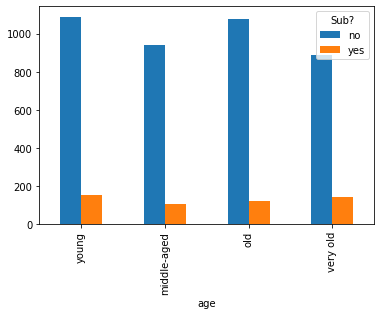

In [76]:
pd.crosstab(qcut_age, 
            df_bank['Sub?']).plot(kind='bar');